In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df_bm25 = pd.read_json('/content/drive/MyDrive/ISS/5004/question_bm25.json')
df_e5 = pd.read_json('/content/drive/MyDrive/ISS/5004/question_e5.json')
df_rerank = pd.read_json('/content/drive/MyDrive/ISS/5004/fusion_rerank_retrieval.json')

In [3]:
for index, row in df_bm25.iterrows():
    if str(row['id']) in row['reference'][0]:
        df_bm25.loc[index, 'bm25_hit'] = 1
    else:
        df_bm25.loc[index, 'bm25_hit'] = 0

In [4]:
df_bm25['bm25_hit'].mean()

0.74925

In [5]:
for index, row in df_e5.iterrows():
    if row['id'] == row['reference'][0]:
        df_e5.loc[index, 'e5_hit'] = 1
    else:
        df_e5.loc[index, 'e5_hit'] = 0

In [6]:
for index, row in df_rerank.iterrows():
    if row['id'] in row['reference']:
        df_rerank.loc[index, 'rerank_hit'] = 1
    else:
        df_rerank.loc[index, 'rerank_hit'] = 0

In [8]:
data = [
    {
        "name":'bm25',
        "score":0.7495
    },
    {
        "name":'embedding(bge)',
        "score":0.9652
    },
    {
        "name":'rerank(bm25+bge)',
        "score":0.9975
    }
]
df_evaluate = pd.DataFrame(data)

In [9]:
df_evaluate

,name,score
0,bm25,0.7495
1,embedding(bge),0.9652
2,rerank(bm25+bge),0.9975


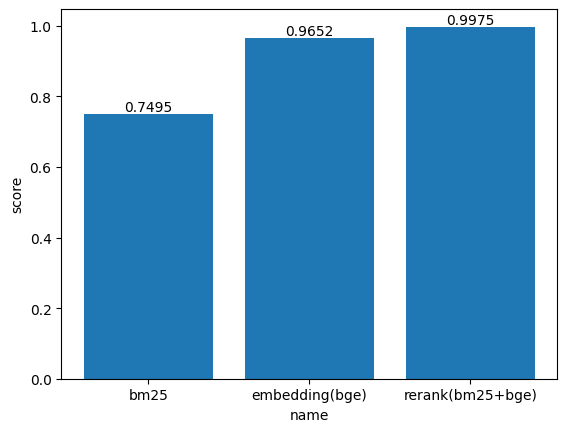

In [10]:
import matplotlib.pyplot as plt
plt.bar(df_evaluate['name'], df_evaluate['score'])
plt.xlabel('name')
plt.ylabel('score')  # 添加纵坐标轴标签

# 添加分数标签
for i, score in enumerate(df_evaluate['score']):
    plt.text(i, score, str(score), ha='center', va='bottom')

plt.show()